# Importing libraries 

In [2]:
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical visualizations
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For preprocessing
from sklearn.linear_model import LogisticRegression  # Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation
import tensorflow as tf  # Deep Learning
from tensorflow.keras.models import Sequential  # Sequential model
from tensorflow.keras.layers import Dense  # Fully connected layers

import warnings
warnings.filterwarnings("ignore")

## Loading dataset

In [4]:
lung=pd.read_csv(r"C:\Users\lakshita\Desktop\datasets\lung_cancer_detection.csv")

## data analysis

In [6]:
lung.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [7]:
lung.tail()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0
889999,890000,55.0,Female,Malta,2021-07-26,Stage II,Yes,Current Smoker,42.8,250,0,0,0,0,Combined,2022-10-19,0


In [8]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [9]:
lung.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
lung["diagnosis_date"] = pd.to_datetime(lung["diagnosis_date"]).astype('int64') // 10**9
lung["end_treatment_date"] = pd.to_datetime(lung["end_treatment_date"]).astype('int64') // 10**9

## Checking NULL Values

In [12]:
lung.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

## Exploratory Data Analysis {EDA}

In [14]:
#sns.pairplot(lung)

## target variable distribution

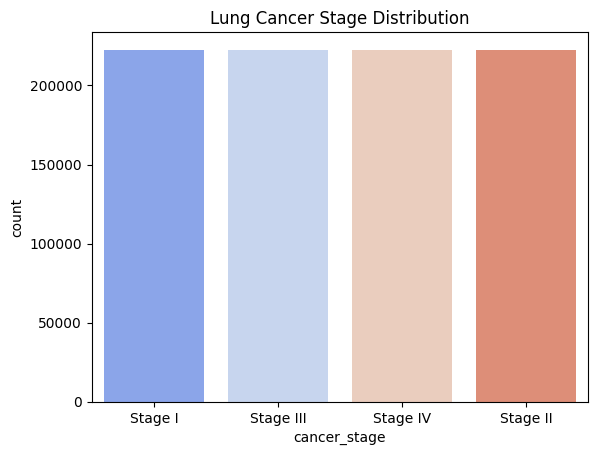

In [16]:
sns.countplot(x='cancer_stage', data=lung, palette="coolwarm")
plt.title("Lung Cancer Stage Distribution")
plt.show()

## Visualizing Feature Distribution

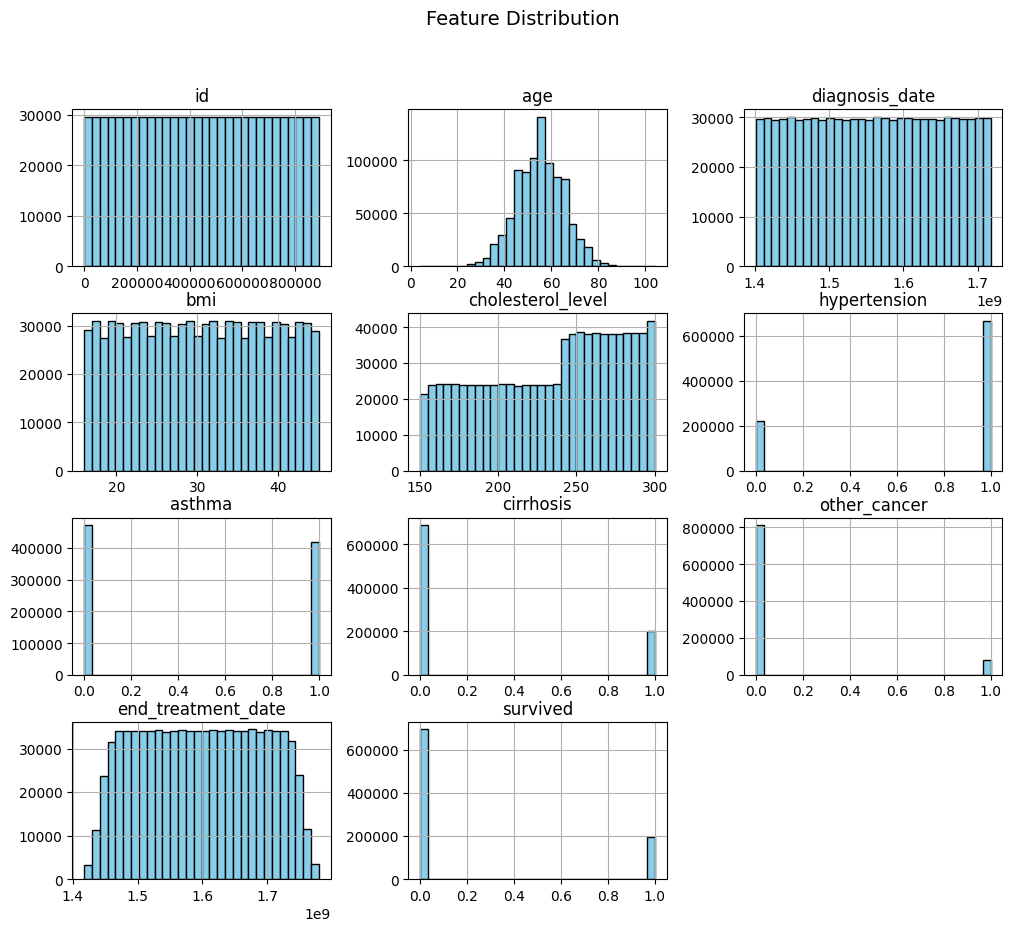

In [18]:
lung.hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distribution", fontsize=14)
plt.show()

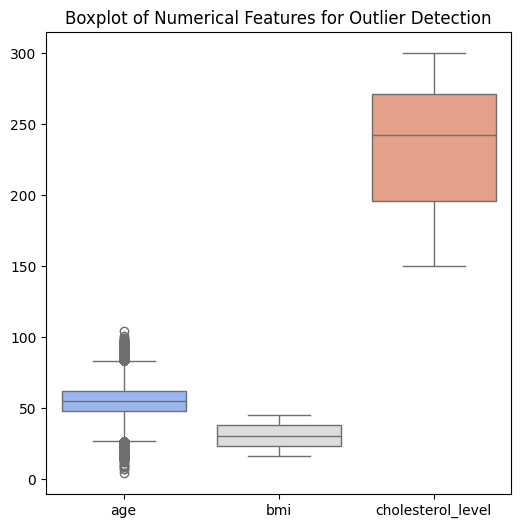

In [19]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=lung[['age', 'bmi', 'cholesterol_level']], palette="coolwarm")
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()

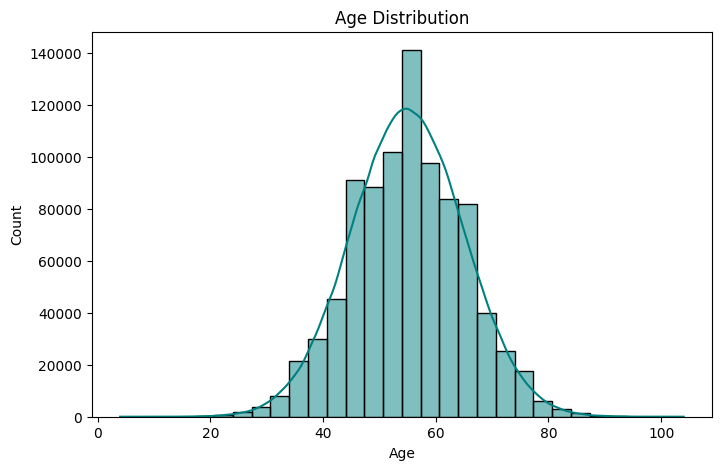

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(lung['age'], bins=30, kde=True, color="teal")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

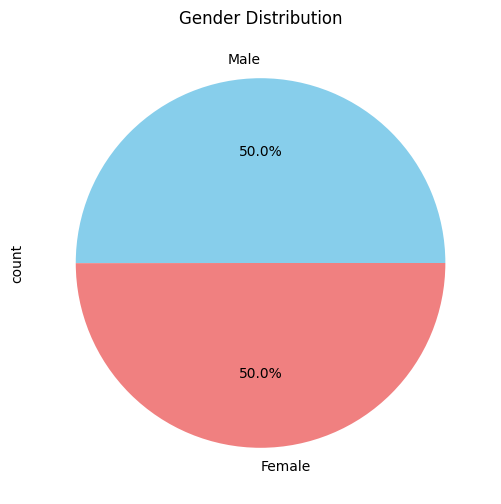

In [21]:
plt.figure(figsize=(6, 6))
lung["gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Gender Distribution")
plt.show()

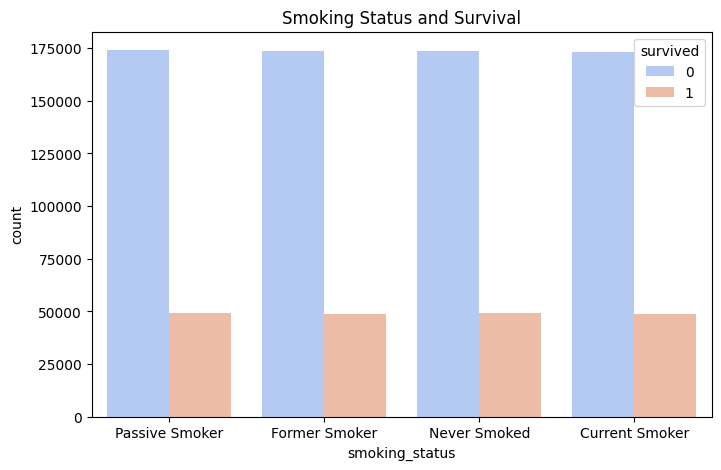

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x="smoking_status", hue="survived", data=lung, palette="coolwarm")
plt.title("Smoking Status and Survival")
plt.show()

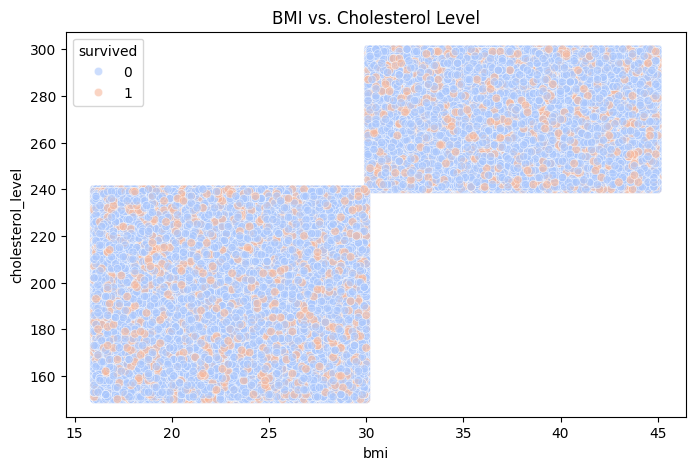

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="bmi", y="cholesterol_level", hue="survived", data=lung, alpha=0.6, palette="coolwarm")
plt.title("BMI vs. Cholesterol Level")
plt.show()

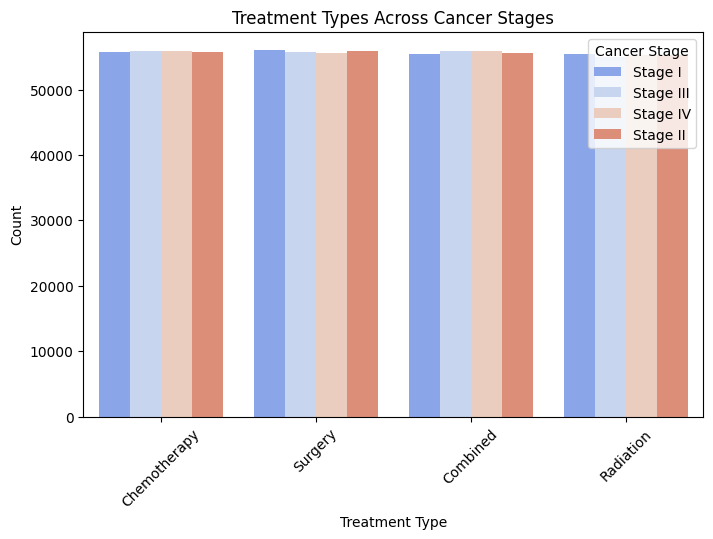

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x="treatment_type", hue="cancer_stage", data=lung, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Treatment Types Across Cancer Stages")
plt.xlabel("Treatment Type")
plt.ylabel("Count")
plt.legend(title="Cancer Stage")
plt.show()

# Label Encoder

In [26]:
# Initialize encoders and scaler
label_encoder = LabelEncoder()

# Encoding categorical variables safely
lung_encoded = lung.copy()  # Work on a copy to preserve original data
categorical_cols = ["gender", "country", "cancer_stage", "family_history", "smoking_status", "treatment_type"]
for col in categorical_cols:
    lung_encoded[col] = label_encoder.fit_transform(lung_encoded[col])


# Standardizing numerical variables

In [28]:

# Standardize numeric columns
scaler = StandardScaler()
numeric_cols = lung_encoded.select_dtypes(include=['number'])  # This gives a DataFrame, not just column names
lung_scaled = lung_encoded.copy()
lung_scaled[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

# Display first few rows
print(lung_scaled.head())


         id       age    gender   country  diagnosis_date  cancer_stage  \
0 -1.732049  0.899796  0.999699  1.667504       -1.094026     -1.341722   
1 -1.732045 -0.500977 -1.000301  0.768677        1.345350      0.447064   
2 -1.732041  0.999851 -1.000301 -0.130151        1.331118      0.447064   
3 -1.732037 -0.400922 -1.000301 -1.542594       -1.150954     -1.341722   
4 -1.732033 -1.801696  0.999699  0.511869        1.556933     -1.341722   

   family_history  smoking_status       bmi  cholesterol_level  hypertension  \
0        1.000407        1.339358 -0.130748          -0.797424     -1.732160   
1        1.000407        1.339358  1.279296           1.067550      0.577314   
2        1.000407       -0.449391  1.613882           0.791257      0.577314   
3       -0.999593        1.339358  1.494387           0.169599      0.577314   
4       -0.999593        1.339358 -1.289852          -1.280936     -1.732160   

     asthma  cirrhosis  other_cancer  treatment_type  end_treatment_

# Correlation Heatmap for Numerical Features

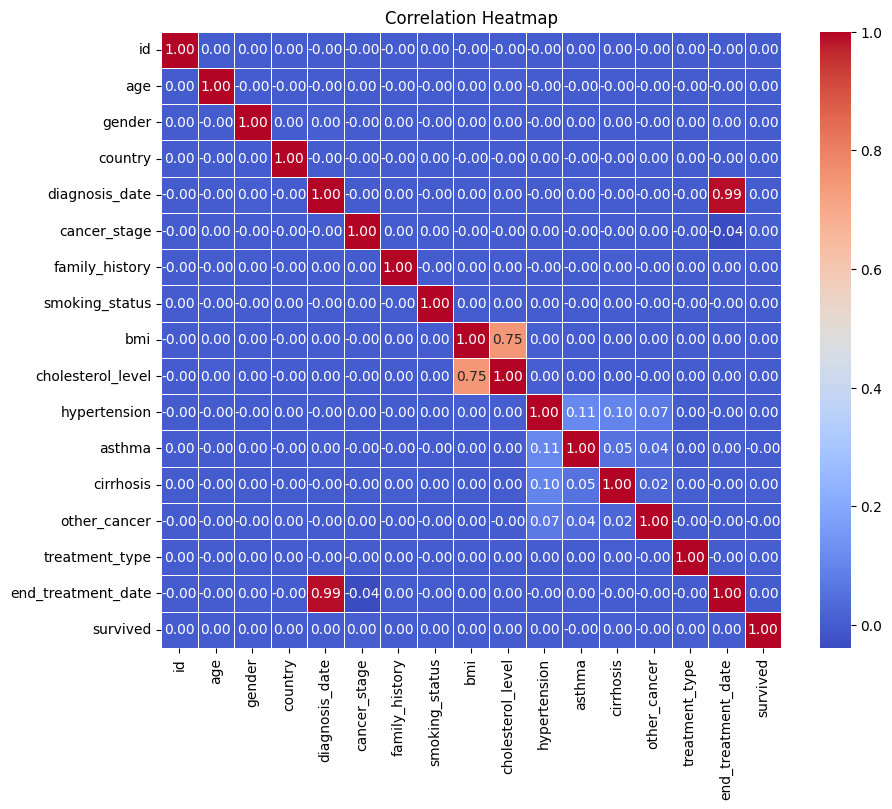

In [30]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(lung_scaled[numeric_cols.columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# ML Model Implementation

## Split Data into Train & Test Sets

In [33]:
X = lung_scaled.drop(columns=["cancer_stage"])  # Features
y = lung_scaled["cancer_stage"]  # Target
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Apply same binning to both train & test targets
y_train = pd.cut(y_train, bins=[-np.inf, 0.33, 0.66, np.inf], labels=[0, 1, 2]).astype(int)
y_test = pd.cut(y_test, bins=[-np.inf, 0.33, 0.66, np.inf], labels=[0, 1, 2]).astype(int)

# 1. Logistic Regression

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred_log = log_reg.predict(X_test)

In [38]:
print("y_test shape:", y_test.shape)
print("y_pred_log shape:", y_pred_log.shape)

y_test shape: (178000,)
y_pred_log shape: (178000,)


## Model Evaluation

Logistic Regression Accuracy: 0.5172078651685393


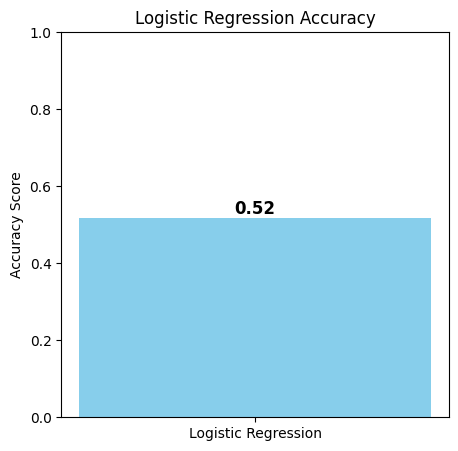

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.90      0.68     89068
           1       0.00      0.00      0.00     44475
           2       0.40      0.27      0.33     44457

    accuracy                           0.52    178000
   macro avg       0.31      0.39      0.33    178000
weighted avg       0.37      0.52      0.42    178000



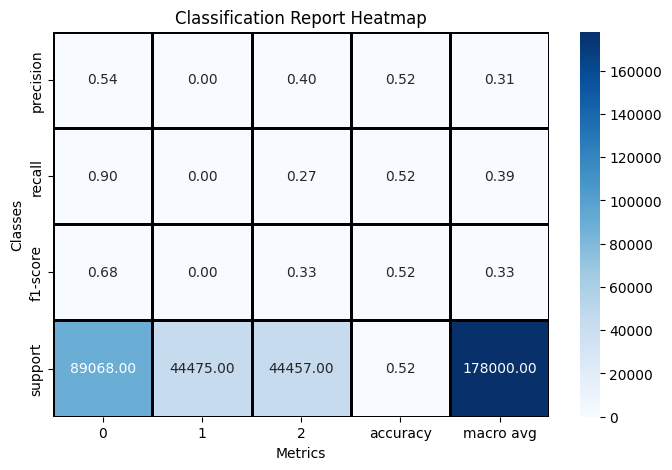

Confusion Matrix:
 [[79878     0  9190]
 [35390     0  9085]
 [32272     0 12185]]


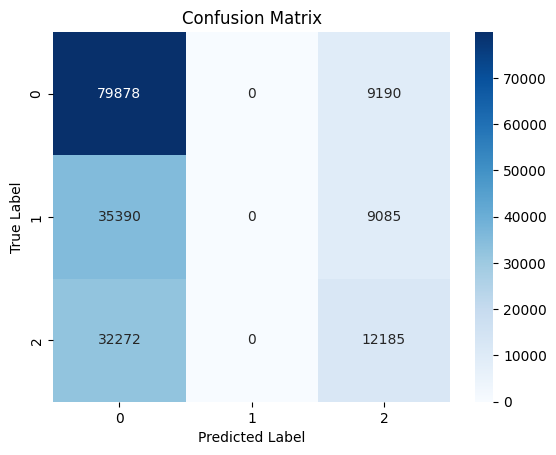

In [40]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)
plt.figure(figsize=(5, 5))
plt.bar(["Logistic Regression"], [accuracy], color="skyblue")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression Accuracy")
plt.text(0, accuracy, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_log))
# Generate classification report as dictionary
report = classification_report(y_test, y_pred_log, output_dict=True)
# Convert to DataFrame for visualization
df_report = pd.DataFrame(report).T
# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor='black')
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 2. Random Forest Classifier

In [42]:
# Training the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [43]:
y_pred_rf = rf_clf.predict(X_test)

## Model Evaluation

Random Forest Accuracy: 0.5017022471910112


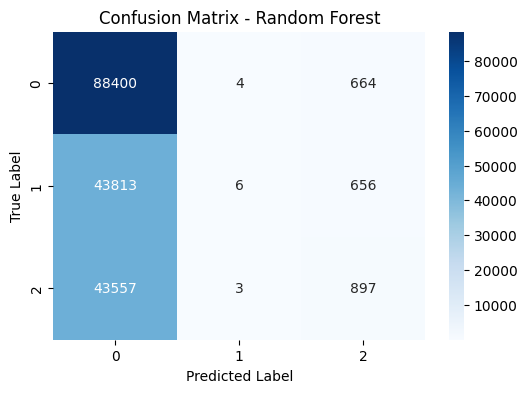


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.99      0.67     89068
           1       0.46      0.00      0.00     44475
           2       0.40      0.02      0.04     44457

    accuracy                           0.50    178000
   macro avg       0.46      0.34      0.24    178000
weighted avg       0.47      0.50      0.34    178000



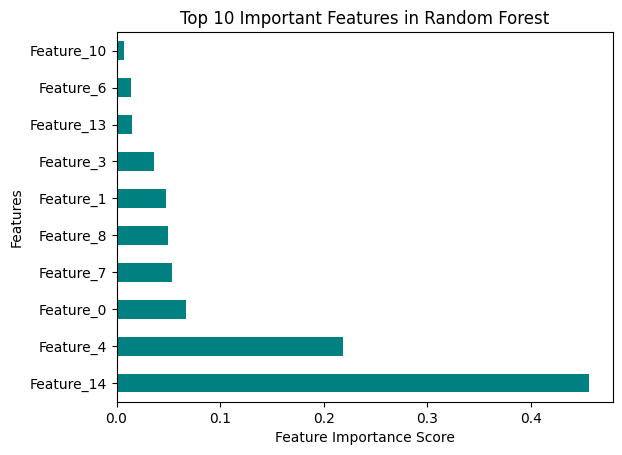

In [45]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
X_df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])

# Feature Importance Plot
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_df.columns)
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest")
plt.show()

## Neural Network for Classification

In [47]:
# Convert target to categorical if multiclass
num_classes = len(y.unique())
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [48]:
# Build neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for multiclass classification
])

In [49]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
44500/44500 ━━━━━━━━━━━━━━━━━━━━ 206s 4ms/step - accuracy: 0.5045 - loss: 1.0294 - val_accuracy: 0.5173 - val_loss: 1.0032
Epoch 2/50
44500/44500 ━━━━━━━━━━━━━━━━━━━━ 199s 4ms/step - accuracy: 0.5186 - loss: 1.0020 - val_accuracy: 0.5179 - val_loss: 1.0025
Epoch 3/50
44500/44500 ━━━━━━━━━━━━━━━━━━━━ 199s 4ms/step - accuracy: 0.5192 - loss: 1.0008 - val_accuracy: 0.5202 - val_loss: 0.9997
Epoch 4/50
44500/44500 ━━━━━━━━━━━━━━━━━━━━ 193s 4ms/step - accuracy: 0.5193 - loss: 0.9996 - val_accuracy: 0.5180 - val_loss: 1.0008
Epoch 5/50
44500/44500 ━━━━━━━━━━━━━━━━━━━━ 210s 5ms/step - accuracy: 0.5198 - loss: 0.9984 - val_accuracy: 0.5207 - val_loss: 0.9984
Epoch 6/50
44500/44500 ━━━━━━━━━━━━━━━━━━━━ 210s 5ms/step - accuracy: 0.5202 - loss: 0.9980 - val_accuracy: 0.5200 - val_loss: 0.9992
Epoch 7/50
44500/44500 ━━━━━━━━━━━━━━━━━━━━ 263s 5ms/step - accuracy: 0.5197 - loss: 0.9985 - val_accuracy: 0.5191 - val_loss: 1.0007
Epoch 8/50
44500/44500 ━━━━━━━━━━━━━━━━━━━━ 209s 5ms/step - ac

In [51]:
# Evaluate model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

5563/5563 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


Neural Network Accuracy: 0.5230449438202247


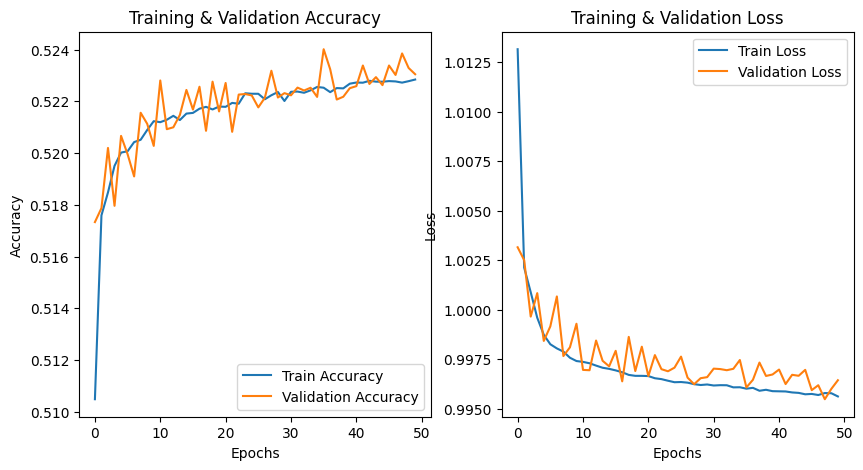

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.86      0.68     89068
           1       0.00      0.00      0.00     44475
           2       0.40      0.36      0.38     44457

    accuracy                           0.52    178000
   macro avg       0.32      0.41      0.35    178000
weighted avg       0.38      0.52      0.43    178000



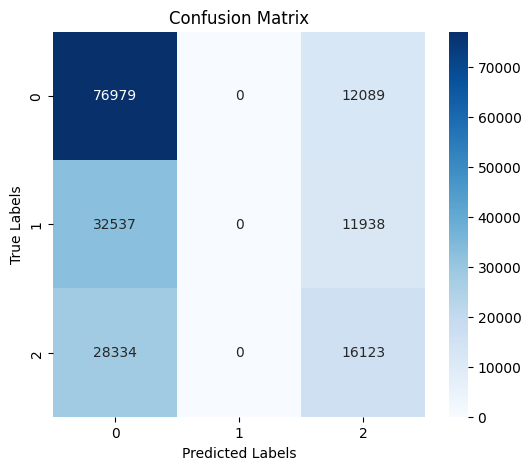

In [52]:
print("Neural Network Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))
# Compute Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test_classes), yticklabels=set(y_test_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
